In [1]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

model = AutoModelForSequenceClassification.from_pretrained("../models/trained_model")
tokenizer = AutoTokenizer.from_pretrained("../models/tokenizer")


C:\Users\Jeeva M\AppData\Roaming\Python\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import pandas as pd

df_test = pd.read_csv("../data/test.csv")
texts = df_test["text"].tolist()
true_labels = df_test["label"].tolist()


In [3]:
from torch.nn.functional import softmax

model.eval()
pred_labels = []

for text in texts:
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    with torch.no_grad():
        outputs = model(**inputs)
        probs = softmax(outputs.logits, dim=1)
        pred_label = torch.argmax(probs, dim=1).item()
        pred_labels.append(pred_label)


              precision    recall  f1-score   support

           0      0.683     0.573     0.623       150
           1      0.524     0.667     0.587       150
           2      0.639     0.567     0.601       150

    accuracy                          0.602       450
   macro avg      0.615     0.602     0.603       450
weighted avg      0.615     0.602     0.603       450



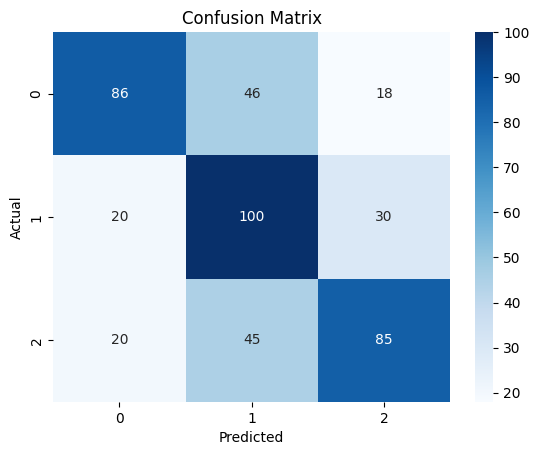

In [5]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print(classification_report(true_labels, pred_labels, digits=3))

cm = confusion_matrix(true_labels, pred_labels)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig("../reports/confusion_matrix.png")
plt.show()


In [6]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
import json

metrics = {
    "accuracy": accuracy_score(true_labels, pred_labels),
    "f1": f1_score(true_labels, pred_labels, average="weighted"),
    "precision": precision_score(true_labels, pred_labels, average="weighted"),
    "recall": recall_score(true_labels, pred_labels, average="weighted")
}

with open("../reports/evaluation_metrics.json", "w") as f:
    json.dump(metrics, f, indent=4)


In [7]:
df_test["predicted"] = pred_labels
wrong_preds = df_test[df_test["label"] != df_test["predicted"]]
wrong_preds.head(10)


,text,label,language,length,predicted
3,Blow to the Lions...Joel Patfull's out for the...,2,en,22,1
4,NUNCA dejen el Snapchat abierto en el celular ...,2,es,17,1
5,Mi hermana y mi mamá hablando con sus personas...,2,es,22,1
7,"@user @user ya lo sé, pobre Uno Te acompaño e...",2,es,12,1
8,Haufenweise meiner Apps bemängeln fehlende Kom...,1,de,11,2
10,Soy una atrevida ay todos me lo dicen,1,es,8,2
11,@user ily,1,de,2,0
16,going Hilton hotel on Thursday for dinner #can...,0,en,8,1
17,90% para designar a quienes somos muy aficiona...,2,es,24,0
19,Bueeeeno... no me siento bien. Gracias playlis...,2,es,10,0
